# Deformation Analysis

## CKI case

#### Imports

In [115]:
from src.hartree_fock_library import HartreeFock,HartreeFockVariational,gram_schmidt
from src.hamiltonian_utils import get_twobody_nuclearshell_model,FermiHubbardHamiltonian,SingleParticleState
import numpy as np
import torch
from typing import Dict,List
from src.qml_models import AdaptVQEFermiHubbard
from src.qml_utils.train import Fit
from src.qml_utils.utils import configuration
from tqdm import trange
#from src.qml_models import AdaptVQEFermiHubbard
import matplotlib.pyplot as plt
#from adapt_vqe_old import AdaptVQEFermiHubbard

#### Hyperparameters

In [116]:
file_name='data/qq.p'
SPS=SingleParticleState(file_name=file_name)
energies=SPS.energies

nparticles_a=2
nparticles_b=2

size_a=SPS.energies.shape[0]//2
size_b=SPS.energies.shape[0]//2

#### J^2 matrix

In [127]:
matrix_j,_=get_twobody_nuclearshell_model(file_name='data/j2.int')

energies=SPS.energies

diag_j=np.zeros(energies.shape[0])
diag_m=np.zeros(energies.shape[0])
label=[]
for i in range(energies.shape[0]):
    n,l,j,m,t,tz=SPS.state_encoding[i]
    label.append((j,m,tz))
    diag_j[i]=j*(j+1)
    diag_m[i]=m

Joperator = FermiHubbardHamiltonian(
    size_a=size_a,
    size_b=size_b,
    nparticles_a=nparticles_a,
    nparticles_b=nparticles_b,
)

Joperator.get_twobody_interaction(twobody_dict=matrix_j)
Joperator.get_external_potential(diag_j)
Joperator.get_hamiltonian()


Moperator = FermiHubbardHamiltonian(
    size_a=size_a,
    size_b=size_b,
    nparticles_a=nparticles_a,
    nparticles_b=nparticles_b,
)

Moperator.get_external_potential(diag_m)
Moperator.get_hamiltonian()


Computing the matrix, pls wait... (u_u) 



100%|██████████| 12/12 [00:01<00:00,  8.13it/s]
592it [00:01, 349.74it/s]


#### Nuclear Shell Hamiltonian with Quadrupole interaction

In [128]:
twobody_matrix,energies=get_twobody_nuclearshell_model(file_name=file_name)
print(twobody_matrix)

Computing the matrix, pls wait... (u_u) 



100%|██████████| 12/12 [00:01<00:00,  6.10it/s]

{(0, 1, 0, 1): 0.6000000000000001, (0, 1, 1, 0): -0.6000000000000001, (1, 0, 0, 1): -0.6000000000000001, (1, 0, 1, 0): 0.6000000000000001, (0, 1, 0, 4): 0.5657000000000002, (0, 1, 4, 0): -0.5657000000000002, (1, 0, 0, 4): -0.5657000000000002, (1, 0, 4, 0): 0.5657000000000002, (0, 2, 0, 2): 0.6000000000000001, (0, 2, 2, 0): -0.6000000000000001, (2, 0, 0, 2): -0.6000000000000001, (2, 0, 2, 0): 0.6000000000000001, (0, 2, 0, 5): 0.2828500000000001, (0, 2, 5, 0): -0.2828500000000001, (2, 0, 0, 5): -0.2828500000000001, (2, 0, 5, 0): 0.2828500000000001, (0, 2, 1, 4): 0.48991057092085716, (0, 2, 4, 1): -0.48991057092085716, (2, 0, 1, 4): -0.48991057092085716, (2, 0, 4, 1): 0.48991057092085716, (0, 3, 0, 3): -0.19999999999999984, (0, 3, 3, 0): 0.19999999999999984, (3, 0, 0, 3): 0.19999999999999984, (3, 0, 3, 0): -0.19999999999999984, (0, 3, 1, 2): 0.7999999999999999, (0, 3, 2, 1): -0.7999999999999999, (3, 0, 1, 2): -0.7999999999999999, (3, 0, 2, 1): 0.7999999999999999, (0, 3, 1, 5): 0.28285, (0

Number of states

In [129]:
n_states=100

In [130]:
TargetHamiltonian=FermiHubbardHamiltonian(size_a=size_a,size_b=size_b,nparticles_a=nparticles_a,nparticles_b=nparticles_b)
print('size=',size_a+size_b,size_b)
TargetHamiltonian.get_external_potential(external_potential=energies[:size_a+size_b])
print('get the two body interaction...')
TargetHamiltonian.get_twobody_interaction(twobody_dict=twobody_matrix)
TargetHamiltonian.twobody_operator=0.5*TargetHamiltonian.twobody_operator
TargetHamiltonian.get_hamiltonian()

print('get the eigenvalue problem...')
eigenvalues,states=TargetHamiltonian.get_spectrum(n_states=n_states)

print(TargetHamiltonian.twobody_operator)

size= 12 6
get the two body interaction...


0it [00:00, ?it/s]

1256it [00:03, 363.67it/s]


get the eigenvalue problem...
  (0, 0)	0.5999999999999998
  (0, 3)	0.28285488076302584
  (0, 45)	0.28285488076302584
  (0, 48)	-0.2000140620056499
  (1, 1)	0.5999999999999998
  (1, 4)	0.14142988076302596
  (1, 7)	0.24495528546042844
  (1, 15)	-7.632783294297951e-17
  (1, 18)	2.440381512883172e-06
  (1, 46)	0.28285244038151297
  (1, 49)	0.19999408698709129
  (1, 60)	-2.440381512883172e-06
  (1, 63)	-0.3000011179899163
  (1, 105)	4.2268647703208595e-06
  (1, 108)	-0.17321725881100863
  (2, 2)	0.20000000000000007
  (2, 5)	0.3999999999999998
  (2, 8)	0.14142499999999997
  (2, 10)	0.14142499999999997
  (2, 14)	-0.4999952049770075
  (2, 16)	-6.938893903907228e-18
  (2, 19)	4.226864770209837e-06
  (2, 30)	-0.19999999999999996
  (2, 33)	0.28284267885546127
  (2, 47)	0.5656926788554613
  :	:
  (223, 186)	0.1732172588110088
  (223, 191)	-0.14142499999999997
  (223, 197)	-0.4000081489927413
  (223, 203)	0.2828426788554613
  (223, 209)	-0.3999999999999999
  (223, 219)	0.2828499999999999
  (223, 22

#### Analysis of the J value vs the energies

In [133]:
js=[]
js_square=[]
ms=[]
constrained_eigenvalues=[]
for i in range(n_states):
    m_value=states[:,i].transpose().conjugate() @ Moperator.hamiltonian @ states[:,i]
    ms.append(m_value)
    j_square=states[:,i].transpose().conjugate() @ Joperator.hamiltonian @ states[:,i]
    j_value=np.abs((1-np.sqrt(1+4*j_square))/2)
    js.append(j_value)
    js_square.append(j_square)

[4.884981308350689e-15, 5.551115123125783e-15, 4.551914400963142e-15, 4.107825191113079e-15, 3.6637359812630166e-15]
[-3.60000167e+00 -2.70000946e+00 -2.70000946e+00 -2.70000946e+00
 -2.70000946e+00 -2.70000946e+00 -9.00008341e-01 -9.00008341e-01
 -9.00008341e-01 -9.00002931e-01 -9.00001597e-01 -9.00001597e-01
 -9.00001597e-01 -8.99999921e-01 -8.99993707e-01 -8.99993707e-01
 -8.99993707e-01 -8.99993707e-01 -8.99993707e-01 -8.99987518e-01
 -8.99987518e-01 -8.99987518e-01 -8.99987518e-01 -8.99987518e-01
 -8.99984091e-01 -8.99984091e-01 -8.99984091e-01 -6.00027640e-01
 -6.00027640e-01 -6.00027640e-01 -6.00027640e-01 -6.00027640e-01
 -6.00027640e-01 -6.00027640e-01 -6.00027640e-01 -6.00027640e-01
 -3.00014536e-01 -3.00014536e-01 -3.00014536e-01 -3.00007366e-01
 -3.00007366e-01 -3.00007366e-01 -3.00007366e-01 -3.00007366e-01
 -3.00005847e-01 -3.00005847e-01 -3.00005847e-01 -3.00005847e-01
 -3.00005847e-01 -3.00003356e-01 -3.00003356e-01 -3.00003356e-01
 -3.00001492e-01 -3.00001492e-01 -3.00

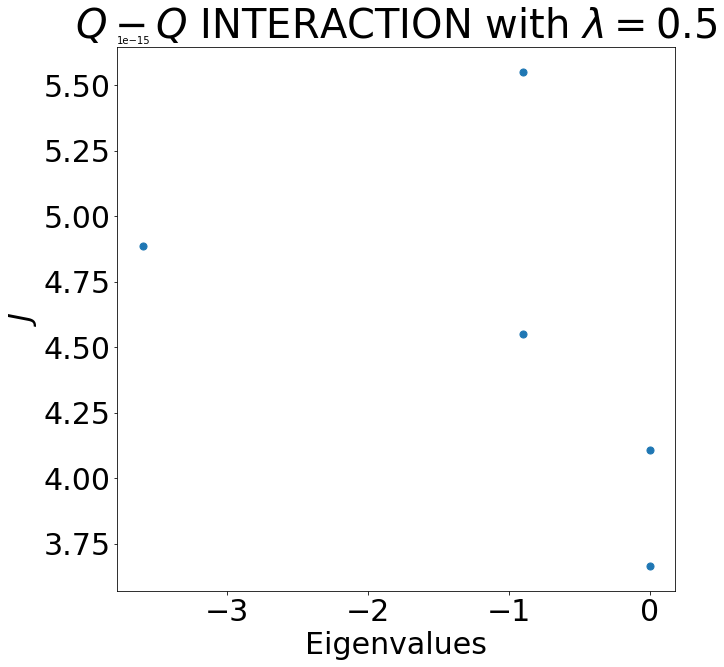

In [135]:
print(js)
js_square=np.asarray(js_square)
print(eigenvalues)
delta_energies=np.roll(eigenvalues,shift=1)-eigenvalues
delta_j=np.abs(np.roll(js_square,shift=1)-js_square)
plt.figure(figsize=(10,10))
plt.scatter(constrained_eigenvalues,js,s=50)
plt.ylabel(r'$J$',fontsize=30)
plt.xlabel(r'Eigenvalues',fontsize=30)
plt.tick_params(which='major',labelsize=30)
plt.title(r'$Q-Q$ INTERACTION with $\lambda=0.5$',fontsize=40)
plt.show()

#### Mutual Info

In [123]:
infos=[]
for i in trange(n_states):
    m_value=states[:,i].transpose().conjugate() @ Moperator.hamiltonian @ states[:,i]
    if np.isclose(m_value,0):
        infos.append(TargetHamiltonian.mutual_info(psi=states[:,i]))

100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


#### Info vs J

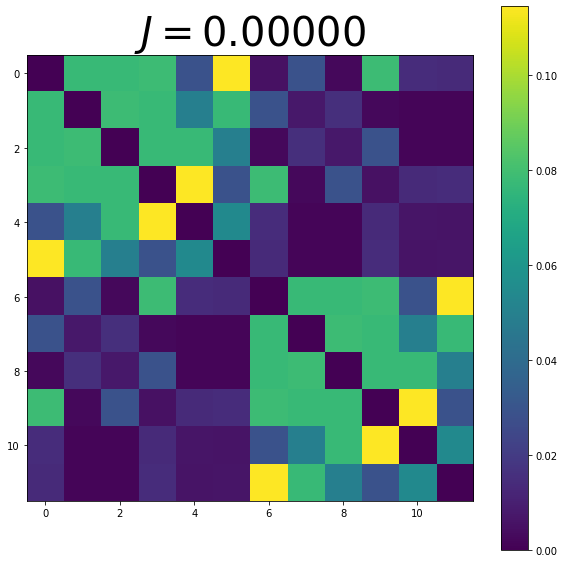

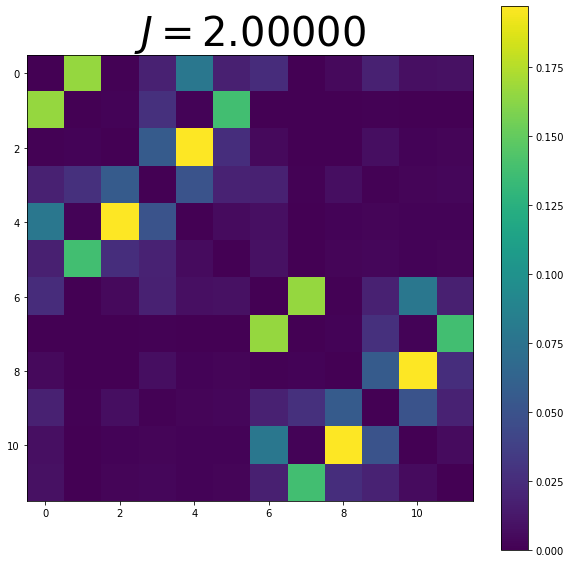

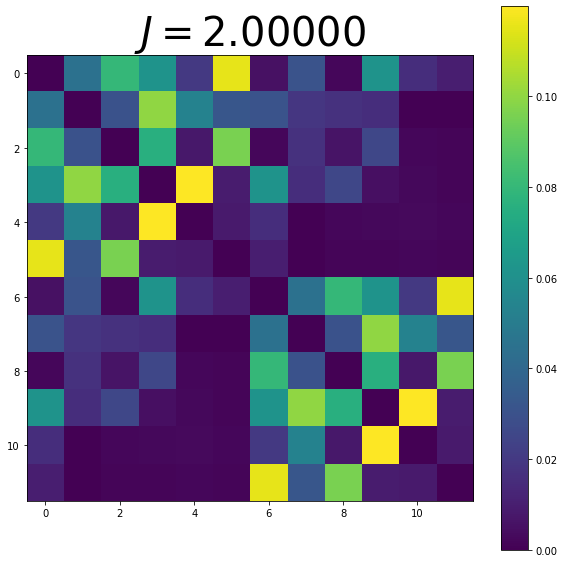

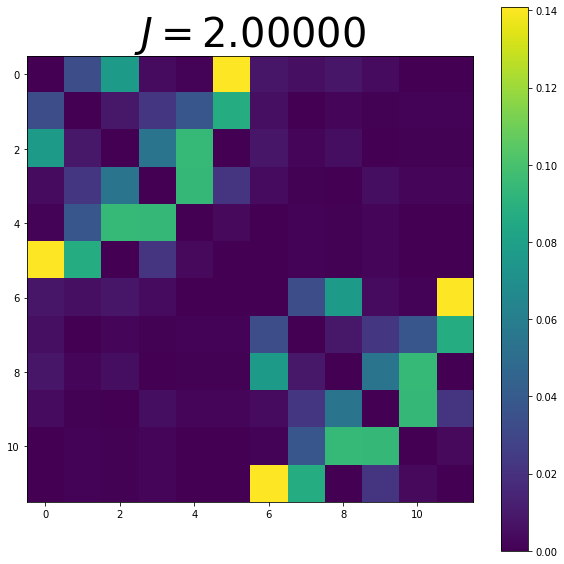

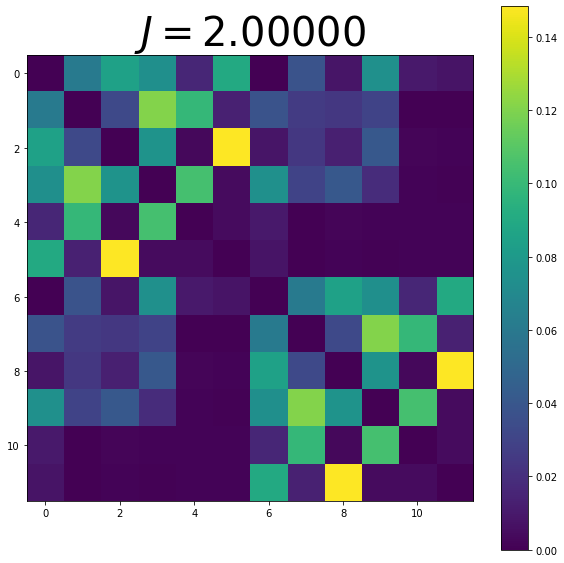

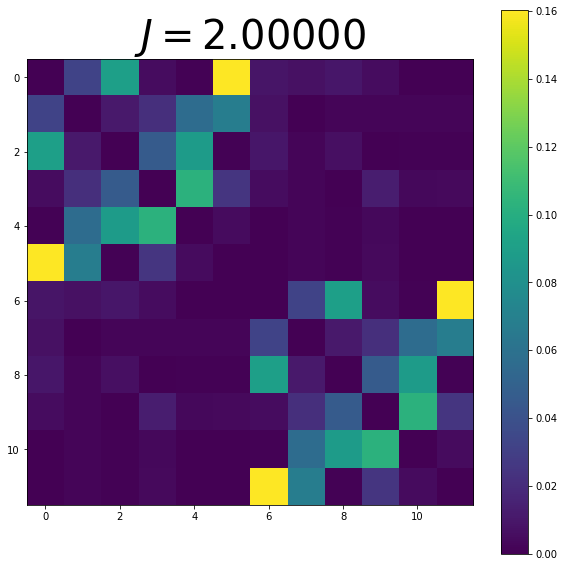

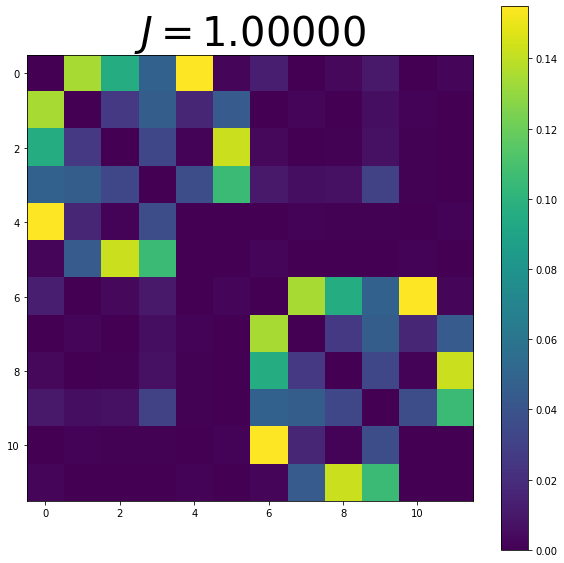

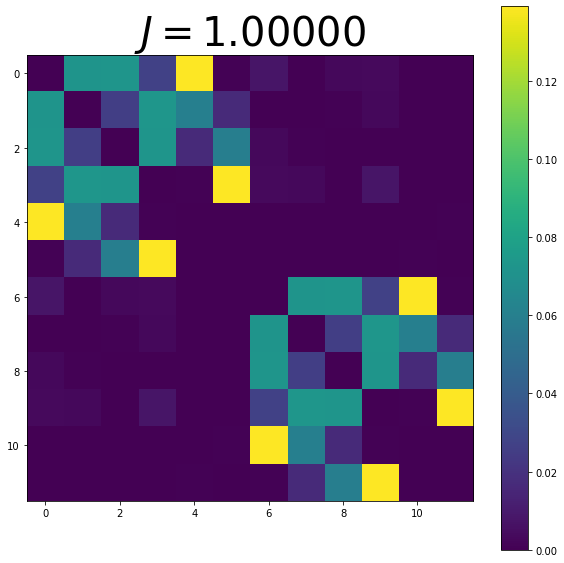

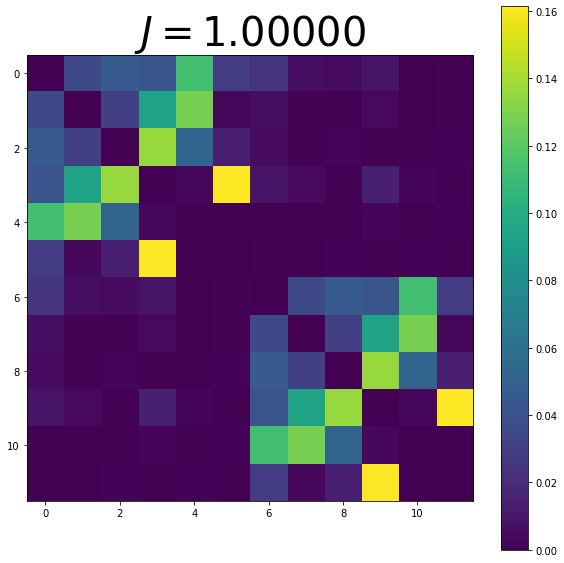

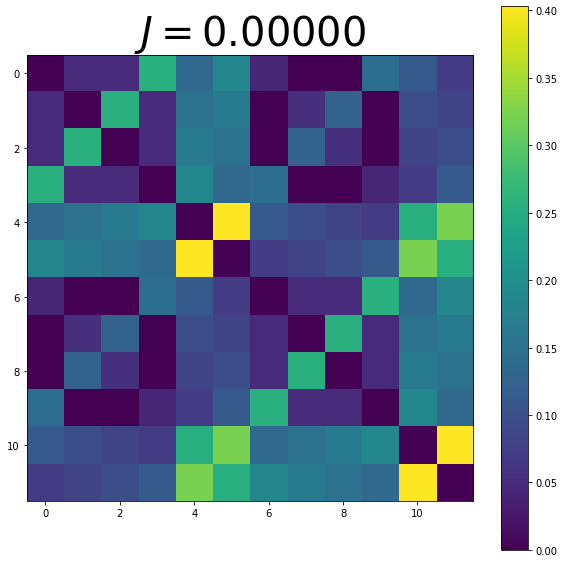

In [124]:
for i in range(n_states):
    plt.figure(figsize=(10,10))
    plt.imshow(infos[i])
    plt.colorbar()
    plt.title(r'$J=$'+f'{js[i]:.5f}',fontsize=40)
    plt.show()

(10, 12, 12)


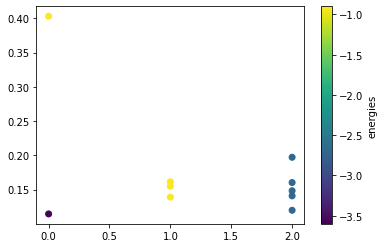

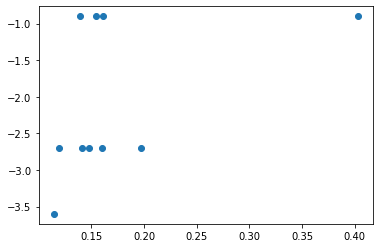

In [126]:
infos=np.asarray(infos)
print(infos.shape)
average_info=np.max(infos,axis=(-1,-2))
plt.scatter(js,average_info,c=eigenvalues, cmap='viridis',)
plt.colorbar(label='energies')
plt.show()

plt.scatter(average_info,eigenvalues)
plt.show()
